In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, mean_squared_error
import ast
from sklearn.preprocessing import MinMaxScaler
import seaborn

In [2]:
data=pd.read_csv('Hotel_Reviews_2.csv') #read the csv file
print(data.head(40))
print(len(data))

                                        Hotel_Address  \
0    s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
1    s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
2    s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
3    s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
4    s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
5    s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
6    s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
7    s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
8    s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
9    s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
10   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
11   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
12   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
13   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
14   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
15   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
16   s Gravesandestraat 55 Oost

In [3]:
# This is the basic data cleaning process. This should be added in all the models
# This cell is a bit slow to run, so it is intended to be run only once

# This part drops the columns that are not needed in the model
data.drop('Hotel_Address',axis=1,inplace=True)  # Drop the column 'Hotel_Address' due to lack of relevance
data.drop('Review_Date',axis=1,inplace=True)    # Drop the column 'Review_Date' due to lack of complete data
data.drop('Additional_Number_of_Scoring',axis=1,inplace=True)  # Drop the column 'Additional_Number_of_Scoring' due to not knowing what the numbers mean
data.drop('lat',axis=1,inplace=True)    # Drop the column 'lat' due to lack of relevance
data.drop('lng',axis=1,inplace=True)    # Drop the column 'lng' due to lack of relevance
data.drop('Total_Number_of_Reviews',axis=1,inplace=True)    # Drop the column 'Total_Number_of_Reviews' due to the number seams to be incorrect


# The next part of the code aims to split the 'Tags' column into multiple columns

data['Tags'] = data['Tags'].apply(ast.literal_eval) # Convert the string to a list, This code is made by chatgpt

# The following 3 lines of code is made by github copilot

tags_expanded = data['Tags'].apply(pd.Series) # Expand the 'Tags' column into multiple columns

tags_expanded.columns = [f'Tag_{i}' for i in range(tags_expanded.shape[1])] # Rename the columns for better readability

data = pd.concat([data, tags_expanded], axis=1) # Concatenate the expanded tags with the original dataframe

data.drop('Tags',axis=1,inplace=True)   # Drop the column 'Tags' due to the data being split into multiple columns

# The next part of the code turns the 'days_since_review' and 'Tag_3' columns into integers
data['days_since_review']=data['days_since_review'].str.extract('(\d+)').astype(int) # Extract the number from the string. This code if made using chatgpt
data['Tag_3'] = data['Tag_3'].str.extract('(\d+)').astype(float) # Extract the number from the string and convert to float. For some reason it did not work as int

# The next part of the code creates a new dataframe with hotel names and removes it from the dataframe data
hotel_names = data['Hotel_Name'] # Create a new dataframe with the hotel names
data.drop('Hotel_Name',axis=1,inplace=True) # Drop the column 'Hotel_Name' as it is not needed in the model



data.fillna(0, inplace=True)  # Replace Nan-values with 0

# Possible use this one to make the model work, but can not ble used due to lack off data
#data.dropna(inplace=True) # Drop the NaN in the colum

In [ ]:
knn_data = data.copy()

print(knn_data.columns) #In progress


categorical_columns = ['Reviewer_Nationality', 'Tag_2', 'Tag_3', 'Tag_4', 'Tag_5']  # Tags that has too many unique numbers, so my kernel crash..

for col in categorical_columns:
    print(f"{col}: {knn_data[col].nunique()} unique values")            # This is made by chatgpt to find out why my kernel crash. This is currently my main problem


knn_data.drop(['Negative_Review', 'Positive_Review'], axis=1, inplace=True)     #'Reviewer_Nationality'

knn_data = pd.get_dummies(knn_data, columns=categorical_columns, dtype=int)
# knn_data = pd.get_dummies(knn_data, dtype=int)        # Still in progress. This one is currently not working because of the number of binary values created
print(len(knn_data))
print(knn_data.head())



Index(['Average_Score', 'Reviewer_Nationality', 'Negative_Review',
       'Review_Total_Negative_Word_Counts', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score',
       'days_since_review', 'Tag_0', 'Tag_1', 'Tag_2', 'Tag_3', 'Tag_4',
       'Tag_5'],
      dtype='object')
Reviewer_Nationality: 227 unique values
Tag_2: 2413 unique values
Tag_3: 32 unique values
Tag_4: 16 unique values
Tag_5: 2 unique values
515738
   Average_Score  Review_Total_Negative_Word_Counts  \
0            7.7                                397   
1            7.7                                  0   
2            7.7                                 42   
3            7.7                                210   
4            7.7                                140   

   Review_Total_Positive_Word_Counts  \
0                                 11   
1                                105   
2                                 21   
3       

In [6]:
print(knn_data.dtypes)
print(knn_data.select_dtypes(include=['object']).head())

Average_Score                                 float64
Review_Total_Negative_Word_Counts               int64
Review_Total_Positive_Word_Counts               int64
Total_Number_of_Reviews_Reviewer_Has_Given      int64
Reviewer_Score                                float64
                                               ...   
Tag_4_ Stayed 3 nights                          int64
Tag_4_ Submitted from a mobile device           int64
Tag_4_0                                         int64
Tag_5_0                                         int64
Tag_5_ Submitted from a mobile device           int64
Length: 255, dtype: object
            Tag_0                         Tag_1
0   Leisure trip                        Couple 
1   Leisure trip                        Couple 
2   Leisure trip    Family with young children 
3   Leisure trip                 Solo traveler 
4   Leisure trip                        Couple 


In [7]:
# percentage = 1
# sample_size = int(knn_data.shape[0] * percentage)
# knn_data_sample = knn_data.sample(n=sample_size, random_state=69)       # In progress

features = knn_data.columns.difference(['Average_Score'])  # Returns all data except Avrage Score, because this might be higly correlated to what we want to predict
scaler = MinMaxScaler()                                          
knn_data[features] = scaler.fit_transform(knn_data[features])  # Scale the columns from 0-1

X = knn_data.drop('Average_Score', axis=1) # Probably dont need .drop?
y = knn_data['Reviewer_Score'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=69) #Split the data in to train/test-set

knn = KNeighborsRegressor(n_neighbors=5)        # Use regression because the values are continuous. Will probably try to make it fit with a classifier..?
knn.fit(X_train, y_train)                      

y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)


print(f'KNN Modellens Nøyaktighet: {mse:.4f}')


ValueError: could not convert string to float: ' Leisure trip '

<Axes: xlabel='Reviewer_Score'>

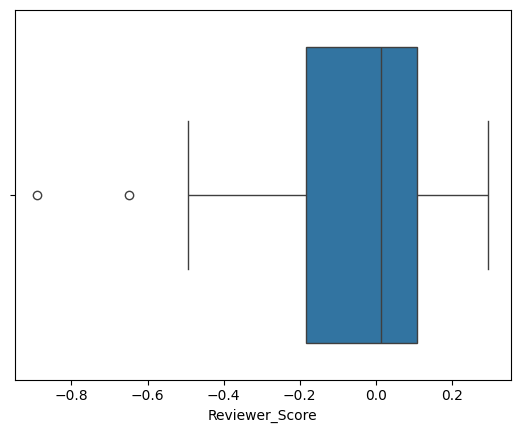

In [ ]:
seaborn.boxplot(x=y_test-y_pred)

In [ ]:
print(len(knn_data))  # Testing how much data in the model

515738
